# ESS Immigration

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
from essutils import utils

## Import immigration data from *European Social Survey*
* This contains data on various countries from Rounds 1 and 7 (2002 and 2014)
* Some countries are missing data from one or the other round

In [2]:
imm = utils.get_data(utils.IMMDATA)

In [3]:
imm.columns

Index(['cntry', 'cname', 'cedition', 'cproddat', 'cseqno', 'name', 'essround',
       'edition', 'idno', 'dweight', 'pspwght', 'pweight', 'acetalv',
       'eimpcnt', 'gvrfgap', 'imbleco', 'imdetbs', 'imdetmr', 'imtcjob',
       'imwbcrm', 'lwdscwp', 'noimbro', 'pplstrd', 'qfimchr', 'qfimcmt',
       'qfimedu', 'qfimlng', 'qfimwht', 'qfimwsk'],
      dtype='object')

## The following countries are represented

In [4]:
countries = imm.cntry.unique()

### Country Groups

In [5]:
VISEGRAD = ["PL", "HU", "CZ"]
BENELUX = ["BE", "NL", "LU"]
CORE = ["DE", "FR", "IT"]
NORDIC = ["DK", "NO", "SE"]
SOUTH = ["ES", "PT", "GR", "IT", "SI"]
BALTIC = ["EE", "FI", "LT"]
OTHER = ["CH", "GB", "IE", "IL"]

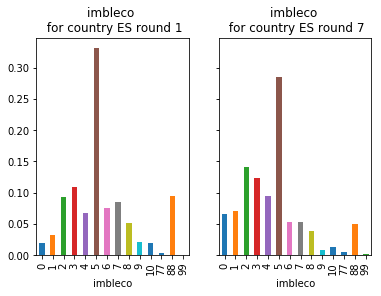

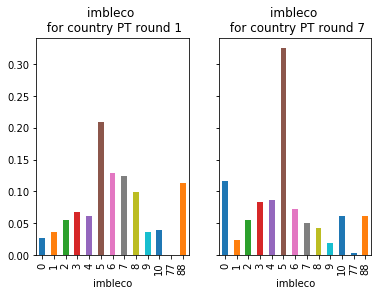

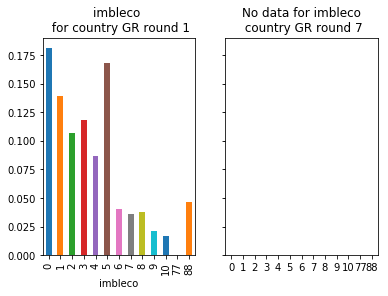

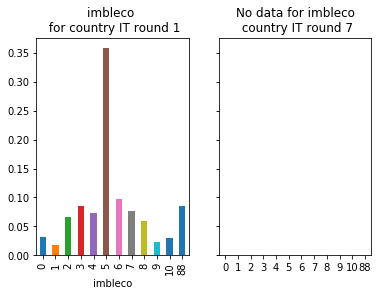

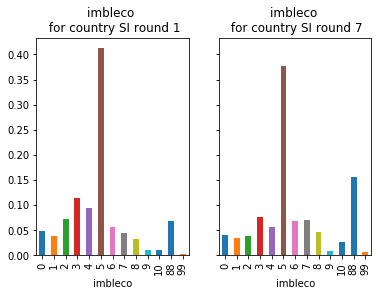

In [6]:
utils.barplot(imm, "imbleco", countries=SOUTH)

In [7]:
c = utils.get_wtd_val_cts(imm, 'PL', 7, 'eimpcnt')

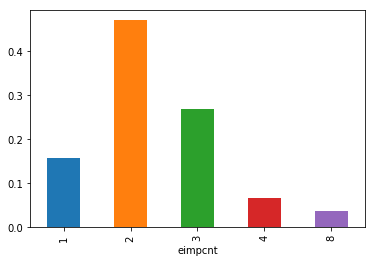

In [8]:
c.plot(kind='bar')

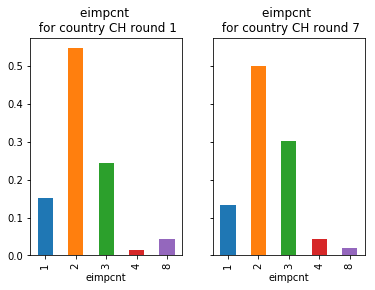

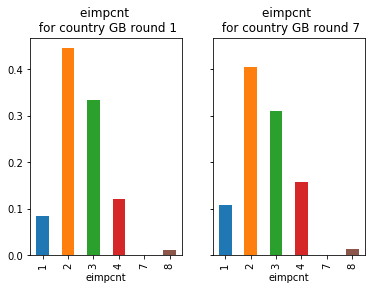

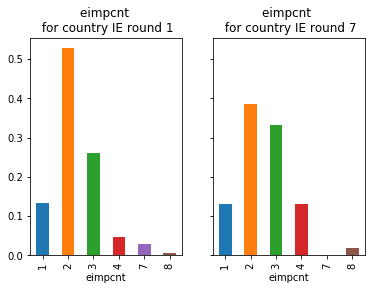

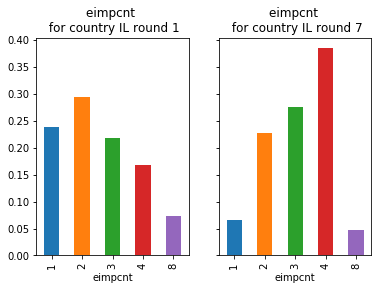

In [9]:
utils.barplot(imm, "eimpcnt", countries=OTHER)

In [10]:
def df2responses(dfin, cntry, rnd, var):
    edata = utils.get_wtd_val_cts(dfin, cntry, rnd, var)
    edata.rename_axis("response", inplace=True)
    df = edata.to_frame() # pd.DataFrame(data={'imbleco': edata.data, 'cntry': 'HU'})
    df["cntry"] = cntry
    df = df.reset_index()
    return df

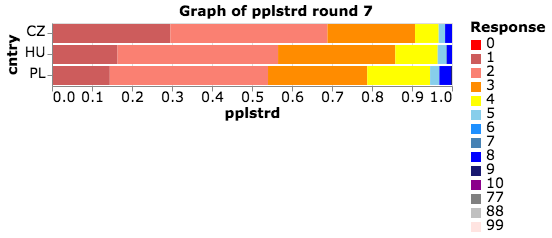

In [13]:
utils.plot_group(imm, VISEGRAD, 7, 'pplstrd')

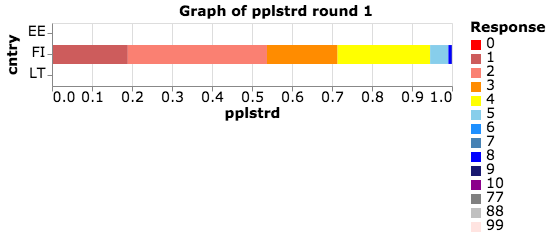

In [14]:
utils.plot_group(imm, BALTIC, 1, 'pplstrd')

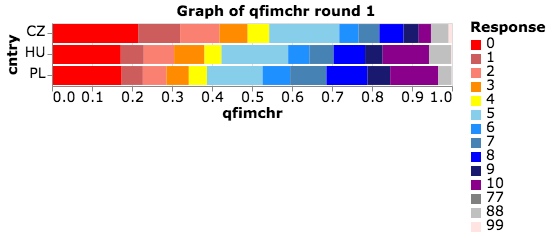

In [15]:
utils.plot_group(imm, VISEGRAD, 1, 'qfimchr')

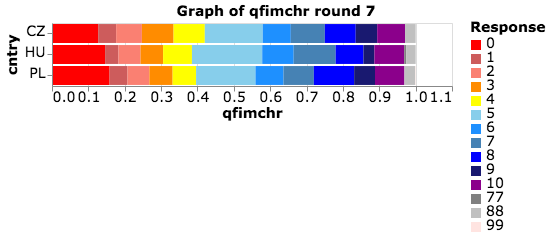

In [54]:
utils.plot_group(imm, VISEGRAD, 7, 'qfimchr')

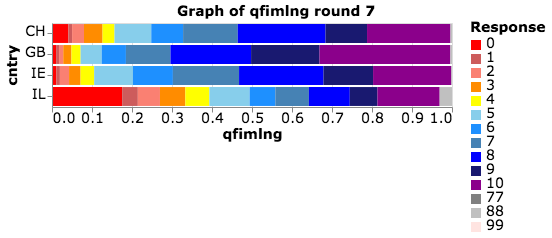

In [55]:
utils.plot_group(imm, OTHER, 7, 'qfimlng')

In [19]:
dfc = utils.countries_to_plotting_frame(imm, CORE, 1, "qfimlng")

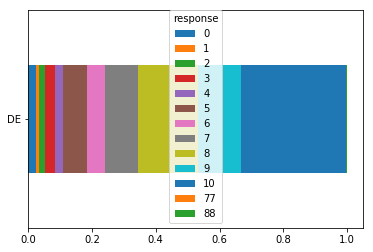

In [50]:
dfc2 = dfc.groupby('cntry').get_group('DE')
dfc3 = dfc2[['response', 'qfimlng']]
dfc3 = dfc3.set_index(keys=['response'])
dfc4 = dfc3.T
dfc4.index = ['DE']
dfc4
dfc4.plot(kind='barh', stacked=True)